In [78]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram,circuit_drawer

In [79]:
circuit = QuantumCircuit(3,3)
circuit.h([0])
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure([0,1,2],[0,1,2])
circuit.draw()

┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     1  0  2

In [80]:
noise = NoiseModel()
d1 = depolarizing_error(0.01,1)
d2 = depolarizing_error(0.02,2)

noise.add_all_qubit_quantum_error(d1,["u3","h","x"])
noise.add_all_qubit_quantum_error(d2,["cx"])

In [81]:
backend = AerSimulator()
output = transpile(circuit,backend)
output = backend.run(output,shots=1024,noise=noise)

In [82]:
output = output.result().get_counts(circuit)

In [83]:
mitiaged_count = {key: output[key]*(1-0.2) for key in output}

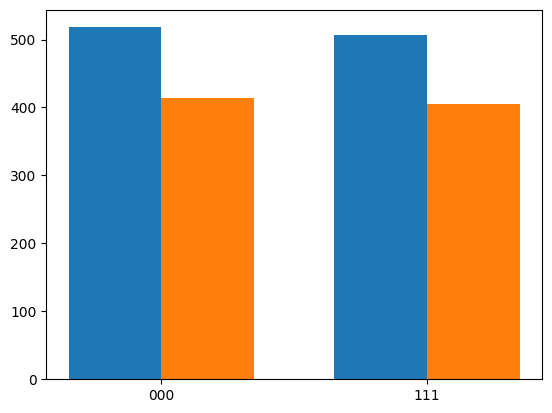

In [97]:
import numpy as np
x = np.arange(len(output))
# Set width of bars
width = 0.35

# Plot bars side by side by shifting the positions
plt.bar(x - width/2, list(output.values()), width)
plt.bar(x + width/2, list(mitiaged_count.values()), width)

# Add x-ticks to match the labels
plt.xticks(x, list(output.keys()))

# Show the plot
plt.show()